### Contents:
- [Importing the Relevant Libraries](#Importing-the-Relevant-Libraries)
- [Final EDA](#Final-EDA)
- [Using Count Vectorizer](#Using-Count-Vectorizer)
- [Mode1 1: Using The NaiveBias Bernoulli](#Mode1-1:-Using-The-NaiveBias-Bernoulli)
- [Gridsearch + BernoulliNB function](#Gridsearch-+-BernoulliNB-function)
- [Model 2: Using The Logistic Regression](#Model-2:-Using-The-Logistic-Regression)
- [Gridsearch + Logistic Regression function](#Gridsearch-+-Logistic-Regression-function)
- [Reapeating Process Using TF_IVF](#Reapeating-Process-Using-TF_IVF)
- [Findings and Conclusions](#Findings-and-Conclusions)


In [1]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


## Importing the Relevant Libraries

In [59]:
from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import stop_words
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

## Final EDA

In [3]:
df = pd.read_csv('./datasets/datatobemodelled.csv')

In [4]:
df.head()

,text,title,target
0,since 2015 using nasa hardware scientists and ...,askscience ama series we are experts on nasas ...,1.0
1,wouldnt a pointed bow cut through the water be...,why arent the bows of submarines pointy,1.0
2,i am always confused be centrifugal and centri...,do you weigh less at the equator because of ce...,1.0
3,if the universe is infused with dark matter wo...,could there possibly be black holes that forme...,1.0
4,when i for example hold one arm straight to th...,does the brain send signals consistently to ke...,1.0


In [5]:
df.shape

(1252, 3)

In [6]:
df.isnull().sum() #idk why on cleaning notebook no nulls but upload here got nulls, so just remove since its small

text      0
title     2
target    2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(1250, 3)

In [9]:
X=df[['text','title']]
y=df[['target']]

In [10]:
X['text'][0]

'since 2015 using nasa hardware scientists and researchers have worked with astronauts on the international space station to conduct a series of experiments to grow harvest and eat a variety of crops in space with seeds sent from earth the most recent experiment has the iss crew growing mizuna mustard using two different light recipes and multiple harvests with the experiments final harvest scheduled for later this week this work builds upon decades of nasa and international research into growing plants in space\n\nthese experiments are advancing the knowledge required to successfully grow a large variety of crops on longduration missions such as a crewed mission to mars being able to crops grown in space provides many benefits including supplementing the astronauts packaged diet with essential nutrients and combating diet fatigue\n\nhere answering your questions are\n\n ralph fritsche space crop production project manager nasas kennedy space center\n jess bunchek pseudonaut and associ

In [11]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1251
Data columns (total 1 columns):
target    1250 non-null float64
dtypes: float64(1)
memory usage: 59.5 KB


## Train-Test-Split

In [12]:
stopwords=stop_words.ENGLISH_STOP_WORDS

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

## Using Count Vectorizer

In [14]:
# we start by trying the naive biase first
# Instantiate our CountVectorizer.
#This step was inspired by what i saw online, involving strip-accents and justifying the ngrams
cvec_text = CountVectorizer(stop_words=stopwords, strip_accents = 'ascii', ngram_range=(1, 6), min_df=.03, max_features=30)
cvec_title = CountVectorizer(stop_words=stopwords, strip_accents = 'ascii', ngram_range=(1, 3), min_df=.01,max_features=30)

# the assumption was that post texts with an ngram range of (1, 6) would both clean up noise and be more helpful than those with a range of (1, 1)
# set a min_df to help clean up noise though it was gentler than previous ones
# the assumption was that titles are likely more informative so setting an n-gram range of (1, 4) might provide even more helpful context

In [15]:
X_train_text = cvec_text.fit_transform(X_train.text)
X_train_title = cvec_title.fit_transform(X_train.title)

X_test_text = cvec_text.transform(X_test.text)
X_test_title = cvec_title.transform(X_test.title)

In [16]:
X_train_text_df = pd.DataFrame(X_train_text.todense(), columns=[x+'_text' for x in cvec_text.get_feature_names()])
X_train_text_df.shape

# creating a dataframe with my train post text and checking the shape

(937, 30)

In [17]:
X_train_text_df.columns

Index(['actually_text', 'answer_text', 'body_text', 'day_text', 'did_text',
       'different_text', 'does_text', 'dont_text', 'going_text', 'got_text',
       'im_text', 'ive_text', 'just_text', 'know_text', 'like_text',
       'make_text', 'point_text', 'question_text', 'really_text', 'said_text',
       'say_text', 'says_text', 'space_text', 'sure_text', 'think_text',
       'time_text', 'understand_text', 'water_text', 'way_text', 'years_text'],
      dtype='object')

In [18]:
X_train_title_df = pd.DataFrame(X_train_title.todense(), columns=[y+'_title' for y in cvec_title.get_feature_names()])
X_train_title_df.shape

# creating a dataframe with my train post titles and checking the shape

(937, 30)

In [19]:
X_test_text_df = pd.DataFrame(X_test_text.todense(), columns=[x+'_text' for x in cvec_text.get_feature_names()])
X_test_text_df.shape

# creating a dataframe with my test post text and checking the shape

(313, 30)

In [20]:
X_test_title_df = pd.DataFrame(X_test_title.todense(), columns=[y+'_title' for y in cvec_title.get_feature_names()])
X_test_title_df.shape

# creating a dataframe with my test post titles and checking the shape


(313, 30)

In [21]:
vecced_train_reddit_posts = pd.concat([X_train_text_df, X_train_title_df], axis=1)
vecced_test_reddit_posts = pd.concat([X_test_text_df, X_test_title_df], axis=1)

# concatenating my train text and titles back together as well as my test text and titles

In [22]:
vecced_train_reddit_posts.shape

(937, 60)

In [23]:
vecced_train_reddit_posts

,actually_text,answer_text,body_text,day_text,did_text,different_text,does_text,dont_text,going_text,got_text,...,say_title,surface_title,temperature_title,time_title,use_title,walks_title,water_title,whats_title,wife_title,work_title
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
933,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
934,0,0,0,0,0,0,2,0,0,1,...,0,0,1,0,0,0,0,0,0,0
935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
vecced_test_reddit_posts.shape

# checking the shape of my newly concatenated train dataframe

(313, 60)

## Mode1 1: Using The NaiveBias Bernoulli

In [25]:
# Import our model!
from sklearn.naive_bayes import BernoulliNB

In [26]:
#We create a function to instatiate gridsearch + bn model

## Gridsearch + BernoulliNB function 

In [27]:
def run_the_bn_models(model):
    
    if model == 'bn_1':
        
        bn_params = {               #from the documention and online research, we play around with the params
            'fit_prior': [True],
            'alpha': np.arange(0, 1, 0.1).tolist()} #np.arange(0, 1, 0.1).tolist()
        
        GS = GridSearchCV(BernoulliNB(),
                        bn_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'bn_2':
        
         bn_params = {
            'fit_prior': [False],
            'alpha': np.arange(0, 1, 0.1).tolist()}
        
         GS = GridSearchCV(BernoulliNB(),
                        bn_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    else:
        print('There is an error.')
        
    GS.fit(vecced_train_reddit_posts.values, y_train)
     
    print(f'Train score = {GS.score(vecced_train_reddit_posts.values, y_train)}')
    print(f'Test score = {GS.score(vecced_test_reddit_posts.values, y_test)}')
    
    predictions = GS.predict(vecced_test_reddit_posts.values)
    print('--------')
    print(confusion_matrix(y_test, predictions))
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)
    print(f'Best params = {GS.best_params_}')

In [28]:
run_the_bn_models('bn_1')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Train score = 0.8068303094983992
Test score = 0.7763578274760383
--------
[[139  18]
 [ 52 104]]
True Negatives: 139
False Positives: 18
False Negatives: 52
True Positives: 104
Best params = {'alpha': 0.2, 'fit_prior': True}


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


In [29]:
run_the_bn_models('bn_2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train score = 0.8068303094983992
Test score = 0.7763578274760383
--------
[[139  18]
 [ 52 104]]
True Negatives: 139
False Positives: 18
False Negatives: 52
True Positives: 104
Best params = {'alpha': 0.2, 'fit_prior': False}


[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [30]:
#There is no difference between our 1st and 2nd naive model
#ill just use the bn_1

True negatives are things we correctly predict to be negative.
<br>In our case, posts from subreddit askscience is assigned 1. A true negative means I correctly predicted a word comes from Jokes subreddit

False positives are things we falsely predict to be positive.
<br>In our case, posts from subreddit askscience is assigned 1. A true positive means I incorrectly 
<br>predict a word comes from Askscience, but in actual fact it came from Jokes subreddit.
<br>
<br> In our case we got very few false positives. That means our model is quite legit

False negatives are things we falsely predict to be positive.
<br>In our case, posts from subreddit askscience is assigned 1. A false negative means I incorrectly predicted a word comes from Jokes, but in reality its from Askscience.
<br>
<br>In our case we got abit more false negatives then false positives. 


## Model 2: Using The Logistic Regression

In [31]:
#Logistic Regression Models

In [32]:
#creating a function to instantiate the lr + gridsearchcv

## Gridsearch + Logistic Regression function

In [33]:
def run_the_lr_models(model):
    
    if model == 'lr_1':
        
        lr_1_params = {
            'penalty': ['l1'], #ridge regressiom
            'C':  np.arange(1, 5, 0.1).tolist(), #[1, 1.5, 2, 2.5]
            'class_weight': ['balanced'],
            'warm_start': [True, False],
            'random_state': [42],
            'solver': ['liblinear']}
        
        M = GridSearchCV(LogisticRegression(),
                        lr_1_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'lr_2':
        
        lr_2_params = {
            'penalty': ['l2'], #lasso regression
            'C': np.arange(1, 5, 0.1).tolist(),
            'class_weight': ['balanced'],
            'warm_start': [True, False],            
            'random_state': [42],
            'solver': ['lbfgs', 'liblinear']}
        
        M = GridSearchCV(LogisticRegression(),
                        lr_2_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)

    else:
        print('There is an error.')
        
    M.fit(vecced_train_reddit_posts.values, y_train)
     
    print(f'Train score = {M.score(vecced_train_reddit_posts.values, y_train)}')
    print(f'Test score = {M.score(vecced_test_reddit_posts.values, y_test)}')
    
    predictions = M.predict(vecced_test_reddit_posts.values)
    print('--------')
    print(confusion_matrix(y_test, predictions))
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)
    print(f'Best params = {M.best_params_}')

In [34]:
run_the_lr_models('lr_1')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Train score = 0.8324439701173959
Test score = 0.7859424920127795
--------
[[139  18]
 [ 49 107]]
True Negatives: 139
False Positives: 18
False Negatives: 49
True Positives: 107
Best params = {'C': 1.2000000000000002, 'class_weight': 'balanced', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.5s finished


In [35]:
run_the_lr_models('lr_2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s


Train score = 0.8345784418356457
Test score = 0.7827476038338658
--------
[[137  20]
 [ 48 108]]
True Negatives: 137
False Positives: 20
False Negatives: 48
True Positives: 108
Best params = {'C': 2.6000000000000014, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.8s finished


In [36]:
#Our lr-1 performed better lr_2 so we would take score from this model.


In [37]:
#Comparing Bn_1 & Lr_2 ,
#For Bn_1, the accuracyt of the test scores and train_score differed by 7%
#For Lr_2, the accuracyt of the test scores and train_score differed by 4%
#This suggest Lr_2 to be the more stable one.
#Test_scores for both are similar, with Lr_2 edging ahead with an accuracy of 0.766
#The score suggest that the Lr_2 is generalised enough to work elsewhere, not really overfitting.



In [38]:
#What else can be done?
#Testing out TF-IDF and subsequently doing MultinormialNB
#So far i havent use stemming or lemmitizing. Maybe can consider doing that,

In [39]:
#Trying out TF-IDF
#copy steps above and just change for TF-IDF

## Reapeating Process Using TF_IVF

In [40]:
tvec_text = TfidfVectorizer(stop_words=stopwords, strip_accents = 'ascii', ngram_range=(1, 6), min_df=.03, max_features=30)
tvec_title = TfidfVectorizer(stop_words=stopwords, strip_accents = 'ascii', ngram_range=(1, 3), min_df=.01,max_features=30)

In [41]:
X_train_text_tvec = tvec_text.fit_transform(X_train.text)
X_train_title_tvec = tvec_title.fit_transform(X_train.title)

X_test_text_tvec = tvec_text.transform(X_test.text)
X_test_title_tvec = tvec_title.transform(X_test.title)


In [42]:
X_train_text_tvec_df = pd.DataFrame(X_train_text_tvec.todense(), columns=[x+'_text' for x in cvec_text.get_feature_names()])
print(X_train_text_tvec_df.shape)


X_train_title_tvec_df = pd.DataFrame(X_train_title_tvec.todense(), columns=[y+'_title' for y in cvec_title.get_feature_names()])
print(X_train_title_tvec_df.shape)


(937, 30)
(937, 30)


In [43]:
X_test_text_tvec_df = pd.DataFrame(X_test_text_tvec.todense(), columns=[x+'_text' for x in cvec_text.get_feature_names()])
print(X_test_text_tvec_df.shape)



X_test_title_tvec_df = pd.DataFrame(X_test_title.todense(), columns=[y+'_title' for y in cvec_title.get_feature_names()])
print(X_test_title_tvec_df.shape)

(313, 30)
(313, 30)


In [44]:
vecced_train_reddit_tvec_posts = pd.concat([X_train_text_tvec_df, X_train_title_tvec_df], axis=1)
vecced_test_reddit_tvec_posts = pd.concat([X_test_text_tvec_df, X_test_title_tvec_df], axis=1)

In [45]:
vecced_train_reddit_tvec_posts

,actually_text,answer_text,body_text,day_text,did_text,different_text,does_text,dont_text,going_text,got_text,...,say_title,surface_title,temperature_title,time_title,use_title,walks_title,water_title,whats_title,wife_title,work_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
934,0.0,0.0,0.0,0.0,0.0,0.0,0.55405,0.0,0.0,0.342064,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
935,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.643239,0.0,0.0,0.0


In [46]:
def run_the_mn_models(model):
    
    if model == 'mn_1':
        
        mn_params = {               #from the documention and online research, we play around with the params
            'fit_prior': [True],
            'alpha': np.arange(0, 1, 0.1)}
        
        GS = GridSearchCV(MultinomialNB(),
                        mn_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'mn_2':
        
         mn_params = {
            'fit_prior': [False],
            'alpha': np.arange(0, 1, 0.1)}
        
         GS = GridSearchCV(MultinomialNB(),
                        mn_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    else:
        print('There is an error.')
        
    GS.fit(vecced_train_reddit_tvec_posts.values, y_train)
     
    print(f'Train score = {GS.score(vecced_train_reddit_tvec_posts.values, y_train)}')
    print(f'Test score = {GS.score(vecced_test_reddit_tvec_posts.values, y_test)}')
    
    predictions = GS.predict(vecced_test_reddit_tvec_posts.values)
    print('--------')
    print(confusion_matrix(y_test, predictions))
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)
    print(f'Best params = {GS.best_params_}')

In [47]:
run_the_mn_models('mn_1')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train score = 0.7182497331910352
Test score = 0.7092651757188498
--------
[[ 88  69]
 [ 22 134]]
True Negatives: 88
False Positives: 69
False Negatives: 22
True Positives: 134
Best params = {'alpha': 0.9, 'fit_prior': True}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [48]:
run_the_mn_models('mn_2')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    0.0s remaining:    0.1s


Train score = 0.8207043756670224
Test score = 0.792332268370607
--------
[[130  27]
 [ 38 118]]
True Negatives: 130
False Positives: 27
False Negatives: 38
True Positives: 118
Best params = {'alpha': 0.7000000000000001, 'fit_prior': False}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [49]:
## Multinomial model 2 performed better , having more TPs and TRUE negatives. Has a better test accuracy as well.

In [50]:
def run_the_lr_models(model):
    
    if model == 'lr_1':
        
        lr_1_params = {
            'penalty': ['l1'], #ridge regressiom
            'C': np.arange(1, 5, 0.1).tolist(),
            'class_weight': ['balanced'],
            'warm_start': [True, False],
            'random_state': [42],
            'solver': ['liblinear']}
        
        M = GridSearchCV(LogisticRegression(),
                        lr_1_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'lr_2':
        
        lr_2_params = {
            'penalty': ['l2'], #lasso regression
            'C': np.arange(1, 5, 0.1).tolist(),
            'class_weight': ['balanced'],
            'warm_start': [True, False],            
            'random_state': [42],
            'solver': ['lbfgs', 'liblinear']}
        
        M = GridSearchCV(LogisticRegression(),
                        lr_2_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)

    else:
        print('There is an error.')
        

    M.fit(vecced_train_reddit_tvec_posts.values, y_train)
     
    print(f'Train score = {M.score(vecced_train_reddit_tvec_posts.values, y_train)}')
    print(f'Test score = {M.score(vecced_test_reddit_tvec_posts.values, y_test)}')
    
    predictions = M.predict(vecced_test_reddit_tvec_posts.values)
    print('--------')
    print(confusion_matrix(y_test, predictions))
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)
    print(f'Best params = {M.best_params_}')

In [51]:
run_the_lr_models('lr_1')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Train score = 0.8537886872998933
Test score = 0.7955271565495208
--------
[[133  24]
 [ 40 116]]
True Negatives: 133
False Positives: 24
False Negatives: 40
True Positives: 116
Best params = {'C': 3.200000000000002, 'class_weight': 'balanced', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.4s finished


In [52]:
run_the_lr_models('lr_2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Train score = 0.8495197438633938
Test score = 0.7987220447284346
--------
[[133  24]
 [ 39 117]]
True Negatives: 133
False Positives: 24
False Negatives: 39
True Positives: 117
Best params = {'C': 1.8000000000000007, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.2s finished


In [53]:
# Log reg 1 & 2 performed similarly  regardless of params, hence we can pick either one to compare with our mn model 2

## Findings and Conclusions

By comparing all models it was shown that our TF-IDF with MultinomialNB model has the best performance based on 
<br>1) A more stable accuracy score from train to test 
<br>2) An accuuracy that is not too high, suggesting that our model is not overfit, and quite generalised

<br>We are predicting words from the Jokes subreddit 42% of the time!
<br>Misclassifying words only 20% of the time.

<br>Below we plotted the ROC curve to show our models effectiveness.

In [65]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [66]:
model = MultinomialNB(fit_prior=False,alpha=0.7000000000000001)
model.fit(vecced_train_reddit_tvec_posts.values, y_train)

MultinomialNB(alpha=0.7000000000000001, class_prior=None, fit_prior=False)

In [78]:
probs = model.predict_proba(vecced_test_reddit_tvec_posts)
probs = probs[:, 1]

In [79]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.86


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

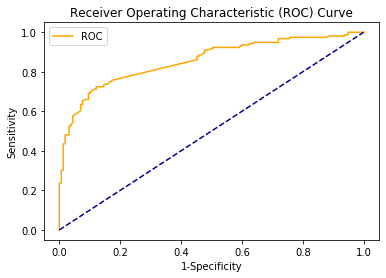

In [74]:
plot_roc_curve(fpr, tpr)

From our ROC curve, the AUC for this model is 0.86. The closer the AUC is to one, the more effective a model it is.
<br>As such, model does quite a good job of distinguishing the positive and the negative values.

In conclusion, our model proved to be quite effective in classifying words from both subreddits. 
This model relies on both the words in sub-text as well as the title.
future works could maybe delve into looking into building separate models for sub-text as well as titles.
Moreover, these models have to constantly be retrained, due to the emergence of new urban words, abbreviations. They may or may not be relaterd to ASKSCIENCE, and simply throwing them out will just make future models less accurate